In [16]:
#import libraries

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
import zipfile
import urllib.request

In [17]:
#setting path for dataset
dataset_path = "/content/simple_fruits_dataset_36.zip"


with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("simple_fruit_dataset")


In [18]:
#setting up file location

data_dir = "/content/simple_fruit_dataset"


In [19]:
#creating generator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3  # 70% train, 30% validation
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)


Found 27 images belonging to 3 classes.
Found 9 images belonging to 3 classes.


In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')])

model.compile(optimizer='adamw', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,706,051 (14.14 MB)

 Trainable params: 3,706,051 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15
)


Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 946ms/step - accuracy: 0.2174 - loss: 5.1321 - val_accuracy: 0.3333 - val_loss: 2.6042
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4702 - loss: 1.2593 - val_accuracy: 0.3333 - val_loss: 1.1156
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3534 - loss: 0.9866 - val_accuracy: 0.3333 - val_loss: 0.9037
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5426 - loss: 0.7905 - val_accuracy: 0.6667 - val_loss: 0.6299
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8947 - loss: 0.3900 - val_accuracy: 0.8889 - val_loss: 0.3284
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8441 - loss: 0.3069 - val_accuracy: 0.7778 - val_loss: 0.5972
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9311 - loss: 0.1567 - val_accuracy: 1.0000 - val_loss: 0.1403
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0910 - val_accuracy: 0.8889 - val_loss: 0.1740
Epoch 9/15

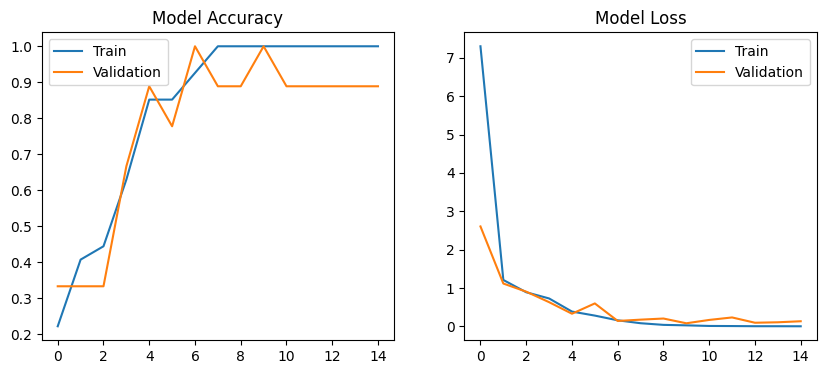

In [22]:
#plotting accuracy and loss

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()
plt.show()


In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Number of validation samples
val_steps = val_generator.samples // val_generator.batch_size + 1

# Predict probabilities
pred_probs = model.predict(val_generator, steps=val_steps)

# Convert probabilities to class indices
y_pred = np.argmax(pred_probs, axis=1)

# True labels
y_true = val_generator.classes

# Class names
class_names = list(val_generator.class_indices.keys())
class_names = ['Apple', 'Banana', 'Orange']  # exactly 3 classes



print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 424ms/step
Classification Report:

              precision    recall  f1-score   support

       Apple       0.33      0.33      0.33         3
      Banana       0.00      0.00      0.00         3
      Orange       0.25      0.33      0.29         3

    accuracy                           0.22         9
   macro avg       0.19      0.22      0.21         9
weighted avg       0.19      0.22      0.21         9

